In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [17]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')


In [18]:
sheets = ["SHA", "QIA", "JA", "ashes", "spider"]
grey = "#838383"
colors = ["black", grey, "#c95428"]
save_path = '../plots/'


In [19]:
sha = pd.read_excel("../manuscript_data.xlsx", sheet_name=sheets[0])
sha.head(3)
sha_summary = sha.describe()
# add data to another sheet of the same excel file.
with pd.ExcelWriter("../summary.xlsx", engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
    sha_summary.to_excel(writer, sheet_name="SHA", index=True)


In [20]:
Hg_TOC= sha["Hg_TOC"]
depth = sha["depth"]
TOC = sha["TOC"]
d202Hg=sha["d202Hg"]
err202=sha["d202_se"]
D199 = sha["D199Hg"]
err199=sha["D199_se"]
D200 = sha["D200Hg"]
err200=sha["D200_se"]
d13C = sha["d13C"]
Hg=sha["Hg"]

# Plot the data with lithological differentiation

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


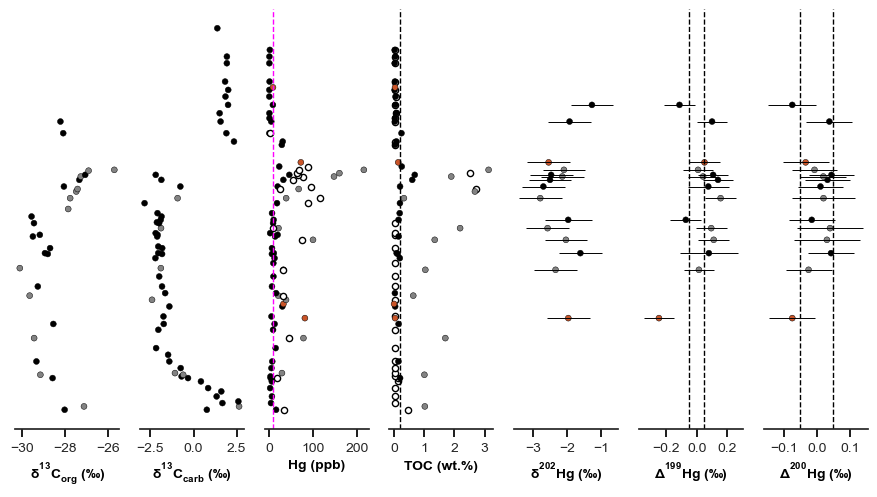

In [21]:
fig, axes = plt.subplots(figsize=(11, 5.45),  # constrained_layout=True,
                         ncols=7, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5, ax6 = axes

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])

#define the variables needed to iterably make the figures.
subs = ['Corg', 'd13C', 'Hg', 'TOC', 'd202Hg', 'D199Hg', 'D200Hg']
ax= [ax0, ax1, ax2, ax3, ax4, ax5, ax6]
xlabels = ["$\delta^{13}C_{org}\;(‰)$", "$\delta^{13}C_{carb}\;(‰)$", "Hg (ppb)", "TOC (wt.%)",
           "$\delta^{202}Hg\;(‰)$", "$\Delta^{199}Hg\;(‰)$", "$\Delta^{200}Hg\;(‰)$"]
err= ["d202_se", "D199_se", "D200_se"]
err_subs = [d202Hg, D199, D200]
ax_2=[ax4, ax5, ax6]

# add rock-eval TOC plot to axes 3
ax3.scatter(sha['TOC_RE'], depth, s=20, color="white", edgecolor="black")

# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=sha, x=sha[sub], y=depth, ax=ax[ix],
                    color='black', legend=False, edgecolor='black',
                    size=20, hue='rock-type', palette=colors
                    )
    ax[ix].tick_params(labelsize=10, color='black')
    ax[ix].set_xlabel(xlabels[ix], fontsize=10, c="black", fontweight="bold")

# add Hg/TOC plot to axes 2
ax2.scatter(Hg_TOC, depth, s=20, color="white", edgecolor="black")

# Show cut-off limits used for interpretation of the data.
ax3.axvline(x=0.2, linestyle="--", color="black", linewidth=1)
ax5.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)
ax5.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
ax6.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)
ax6.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
ax2.axvline(x=10, linestyle="--", color="fuchsia", linewidth=1)
# customize the x-axis ticks.
ax3.set_xticks([0, 1, 2, 3])
ax5.set_xticks([-.2, 0, .2])
ax2.set_xticks([0, 100, 200])
ax0.set_xticks([-30, -28, -26])

# add error bars to Hg-isotope subplots
for ix, sub in enumerate(err):
    ax_2[ix].errorbar(xerr=sha[sub], y=depth,x=err_subs[ix], ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')

plt.savefig("../plots/sha_all2.pdf", dpi=600)

# Plot Al, Fe/Al, V/Al, Hg/Al, Hg/Fe, Hg/(V/Al)

Define variables for data to be used.

In [22]:
Al = sha['Al']
Fe_Al = sha['Fe']/Al
U_Al = sha['U']/Al
Hg_Al = Hg/Al
Hg_Fe = Hg/sha['Fe']
# Mo_Al = sha["Mo"]/Al

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


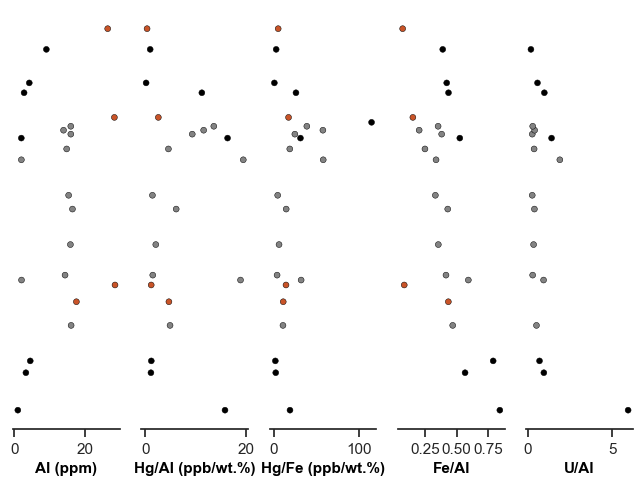

In [23]:
fig, axes = plt.subplots(figsize=(8, 5.45), nrows=1, ncols=5, sharey=True)
ax0, ax1, ax2, ax3, ax4 = axes
ax_list = [ax0, ax1, ax2, ax3, ax4]
plt_list = [Al, Hg_Al, Hg_Fe, Fe_Al, U_Al]
labels = ["Al (ppm)", "Hg/Al (ppb/wt.%)", "Hg/Fe (ppb/wt.%)", "Fe/Al", "U/Al"]
# xticks = [[1, 2, 3, 4, 5, 6, 7], [0, 10, 20]]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])


def make_plot(data, f_size, f_name):
    for i in range(len(ax_list)):
        sns.scatterplot(data=data, x=plt_list[i], y=depth, ax=ax_list[i],
                        color='black', legend=False, edgecolor='black',
                        size=20, hue='rock-type', palette=colors
                        )
        ax_list[i].tick_params(labelsize=f_size)
        # ax_list[i].set_xticks(xticks[i])
        ax_list[i].set_xlabel(labels[i], fontsize=f_size,
                              c="black", fontweight="bold")
    plt.savefig(f'{save_path}{f_name}.pdf')


make_plot(sha, 11, 'sha_supplement')
